In [2]:
data <- read.csv("D:/Research 2014-2015/Data Quality/keyword/Keyword/data.csv")
data <- data[data$document.type=="article",]



dim(data)

[1] 346  61

In [3]:
predictors <- c("no_authors","article_age","page.count","no_references",
                "abstract_length","title_length",
                "abstract_ratio"
               )

## title_length
## no of keywords
names(data)

target <- c("cited.by")

data <- data[,c(predictors,target)]
data <- na.omit(data)

str(data)

[1] "X"                             "ï..authors"                   
 [3] "title"                         "year"                         
 [5] "source.title"                  "volume"                       
 [7] "issue"                         "art..no."                     
 [9] "page.start"                    "page.end"                     
[11] "page.count"                    "cited.by"                     
[13] "link"                          "affiliations"                 
[15] "authors.with.affiliations"     "abstract"                     
[17] "author.keywords"               "index.keywords"               
[19] "references"                    "publisher"                    
[21] "issn"                          "isbn"                         
[23] "coden"                         "language.of.original.document"
[25] "document.type"                 "source"                       
[27] "numkeys"                       "k01"                          
[29] "k01_abstract"                  "k01_title"                    
[31] "k02"                           "k02_abstract"                 
[33] "k02_title"                     "k03"                          
[35] "k03_abstract"                  "k03_title"                    
[37] "k04"                           "k04_abstract"                 
[39] "k04_title"                     "k05"                          
[41] "k05_abstract"                  "k05_title"                    
[43] "k06"                           "k06_abstract"                 
[45] "k06_title"                     "k07"                          
[47] "k07_abstract"                  "k07_title"                    
[49] "abstract_sum"                  "title_sum"                    
[51] "abstract_title_sum"            "no_authors"                   
[53] "article_age"                   "article_squaredage"           
[55] "abstract_length"               "title_length"                 
[57] "no_pages"                      "no_references"                
[59] "review"                        "title_ratio"                  
[61] "abstract_ratio"

'data.frame':	346 obs. of  8 variables:
 $ no_authors     : int  3 3 6 4 3 3 3 2 2 4 ...
 $ article_age    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ page.count     : int  14 13 18 14 9 14 10 13 16 15 ...
 $ no_references  : int  43 62 97 74 40 36 30 42 44 62 ...
 $ abstract_length: int  146 221 154 219 135 192 224 196 261 197 ...
 $ title_length   : int  12 13 12 14 10 21 14 11 10 12 ...
 $ abstract_ratio : num  0 0.0498 0.039 0 0.0296 ...
 $ cited.by       : int  0 0 0 0 1 0 0 0 0 0 ...


# Linear Regression

In [4]:
dim(data)
linear_reg <- lm(cited.by ~ . , data=data)
summary(linear_reg)

[1] 346   8


Call:
lm(formula = cited.by ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6457 -1.3313 -0.6183  0.6484 18.4791 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.106943   1.027461  -1.077   0.2821    
no_authors       0.101809   0.095280   1.069   0.2860    
article_age      3.340066   0.334235   9.993   <2e-16 ***
page.count       0.032628   0.051025   0.639   0.5230    
no_references   -0.003979   0.007258  -0.548   0.5839    
abstract_length -0.007621   0.003035  -2.511   0.0125 *  
title_length    -0.008152   0.035858  -0.227   0.8203    
abstract_ratio  -5.383265   6.782610  -0.794   0.4279    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.927 on 338 degrees of freedom
Multiple R-squared:  0.2394,	Adjusted R-squared:  0.2236 
F-statistic:  15.2 on 7 and 338 DF,  p-value: < 2.2e-16


# Robust Regression

In [5]:
## compute the Huber M -estimator for the regression model, using the
## rlm (robust linear model) function in the MASS package

require(MASS,quietly=TRUE)
robust_reg <- rlm(cited.by ~ . , data=data)
summary(robust_reg)


Call: rlm(formula = cited.by ~ ., data = data)
Residuals:
    Min      1Q  Median      3Q     Max 
-3.2689 -0.7993 -0.4599  1.1538 19.8011 

Coefficients:
                Value   Std. Error t value
(Intercept)     -1.3519  0.5170    -2.6148
no_authors       0.0524  0.0479     1.0927
article_age      2.4332  0.1682    14.4670
page.count       0.0089  0.0257     0.3449
no_references    0.0001  0.0037     0.0366
abstract_length -0.0026  0.0015    -1.7135
title_length    -0.0064  0.0180    -0.3559
abstract_ratio  -1.8860  3.4131    -0.5526

Residual standard error: 1.244 on 338 degrees of freedom

[1] 78

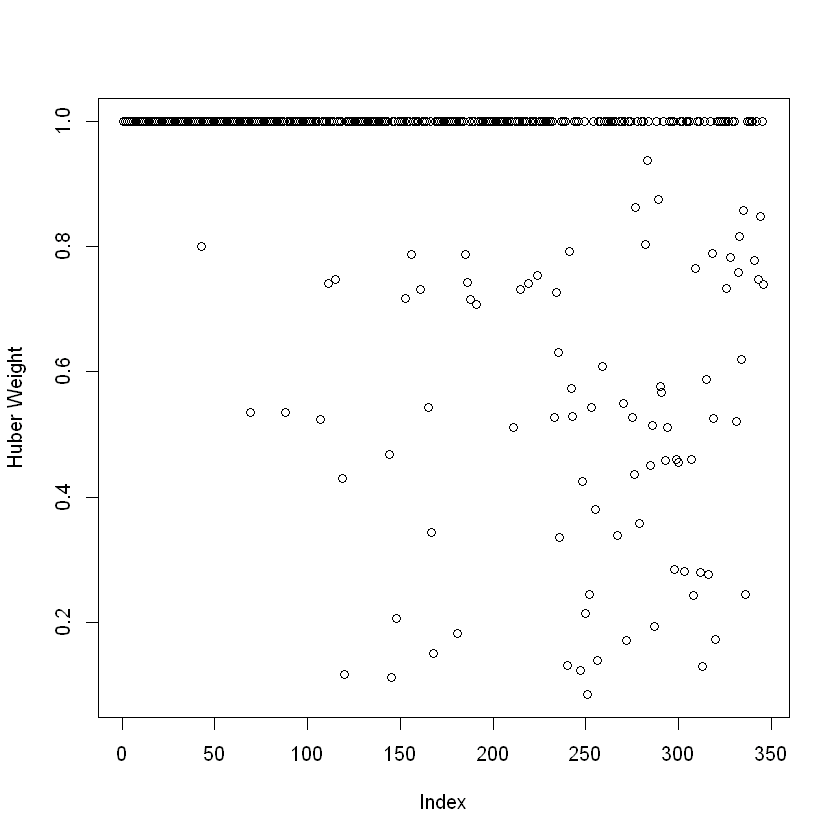

In [6]:
plot(robust_reg$w, ylab="Huber Weight")
smallweights <- which(robust_reg$w < 0.8)
length(smallweights)


In [11]:
print(summary(data[smallweights,"cited.by"]))
data[smallweights,"cited.by"]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.000   6.000   5.949   9.000  23.000 


[1]  4  0  0  1  3  5 15  4 16  9  3  3  3  4  6 12 10  3  3  3  3  4  3  3  3
[26]  0  1  6  8 16  1  6  0 17  7 11 23 10  6  8 15  6  8  0 13  6  7  8  7  0
[51] 12  6  6  7  0  9  7  7  9  7 10  1  9 16  0  9  1  0 13  1  1  0  1  6 10
[76]  1  1  1

# Modified Linear Regression

In [20]:
data2 <- data[-smallweights,]
dim(data2)
linear_reg2 <- lm(cited.by ~ . , data=data2)
summary(linear_reg2)


[1] 268   8


Call:
lm(formula = cited.by ~ ., data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7612 -0.5797 -0.4576  0.4619  2.2996 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.2870558  0.3383158  -3.804 0.000177 ***
no_authors       0.0208890  0.0309853   0.674 0.500809    
article_age      2.1945943  0.1210907  18.124  < 2e-16 ***
page.count      -0.0056766  0.0161185  -0.352 0.724987    
no_references    0.0001219  0.0022699   0.054 0.957207    
abstract_length -0.0008814  0.0009565  -0.921 0.357657    
title_length    -0.0126151  0.0116395  -1.084 0.279448    
abstract_ratio  -0.8224969  2.2292295  -0.369 0.712458    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8302 on 260 degrees of freedom
Multiple R-squared:  0.5652,	Adjusted R-squared:  0.5535 
F-statistic: 48.28 on 7 and 260 DF,  p-value: < 2.2e-16


In [58]:
## calculating journal median
summary(data2$cited.by)
#hist(data2$cited.by)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   1.000   1.056   2.000   5.000 

In [53]:
## creatng a new target
data$target_cut <- NA

threshold    <- summary(data2$cited.by)[3] ## median=1

## print(c(first_threshold,second_threshold,third_threshold))

for (row in 1:nrow(data))  {
    if (data[row,"cited.by"] <= threshold )  {data[row,"target_cut"] <- "Less than Median"}
                    else {data[row,"target_cut"] <- "More than Median"}
    
}

data$target_cut <- as.factor(data$target_cut)

##head(data,n=50)
summary(data$target_cut)

Less than Median More than Median 
             202              144

In [57]:
target2 <-c("target_cut")
data_cut <- data[,c(predictors,target2)]
logistic_reg <- glm(target_cut ~ ., data=data_cut, family=binomial(link='logit') )
summary(logistic_reg)


Call:
glm(formula = target_cut ~ ., family = binomial(link = "logit"), 
    data = data_cut)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.7279  -0.6262   0.7208   1.9584  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -3.854374   0.846147  -4.555 5.23e-06 ***
no_authors       0.078624   0.076566   1.027    0.304    
article_age      2.584911   0.281602   9.179  < 2e-16 ***
page.count       0.014642   0.041361   0.354    0.723    
no_references    0.003436   0.005853   0.587    0.557    
abstract_length -0.002974   0.002542  -1.170    0.242    
title_length    -0.010483   0.029614  -0.354    0.723    
abstract_ratio   5.730927   5.547237   1.033    0.302    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 469.89  on 345  degrees of freedom
Residual deviance: 362.31  on 338  degrees of freedom
AIC: 378.31

Number o

In [8]:
save.image()